In [1]:
mkdir /root/.kaggle

In [2]:
!chmod 600 kaggle.json 

In [3]:
!mv kaggle.json /root/.kaggle/

In [4]:
!mkdir /proj

In [5]:
!mkdir /proj/train

In [6]:
!kaggle datasets download -d msambare/fer2013

 81% 49.0M/60.3M [00:00<00:00, 143MB/s]
100% 60.3M/60.3M [00:00<00:00, 145MB/s]


In [7]:
!mkdir /temp

In [8]:
!unzip fer2013.zip -d /temp

Streaming output truncated to the last 5000 lines.
  inflating: /temp/train/sad/Training_65242339.jpg  
  inflating: /temp/train/sad/Training_65267116.jpg  
  inflating: /temp/train/sad/Training_65275626.jpg  
  inflating: /temp/train/sad/Training_6529266.jpg  
  inflating: /temp/train/sad/Training_65329617.jpg  
  inflating: /temp/train/sad/Training_65338712.jpg  
  inflating: /temp/train/sad/Training_65338797.jpg  
  inflating: /temp/train/sad/Training_65387162.jpg  
  inflating: /temp/train/sad/Training_65404494.jpg  
  inflating: /temp/train/sad/Training_65426218.jpg  
  inflating: /temp/train/sad/Training_65430136.jpg  
  inflating: /temp/train/sad/Training_65437377.jpg  
  inflating: /temp/train/sad/Training_6545735.jpg  
  inflating: /temp/train/sad/Training_65463385.jpg  
  inflating: /temp/train/sad/Training_65473985.jpg  
  inflating: /temp/train/sad/Training_65502829.jpg  
  inflating: /temp/train/sad/Training_65505359.jpg  
  inflating: /temp/train/sad/Training_65508578.jpg

In [9]:
#IMPORTING LIBRARIES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

#from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [10]:
#DISPLAYING IMAGES

picture_size = 48
#folder_path = "archive/images/images/"
folder_path = "/temp/"

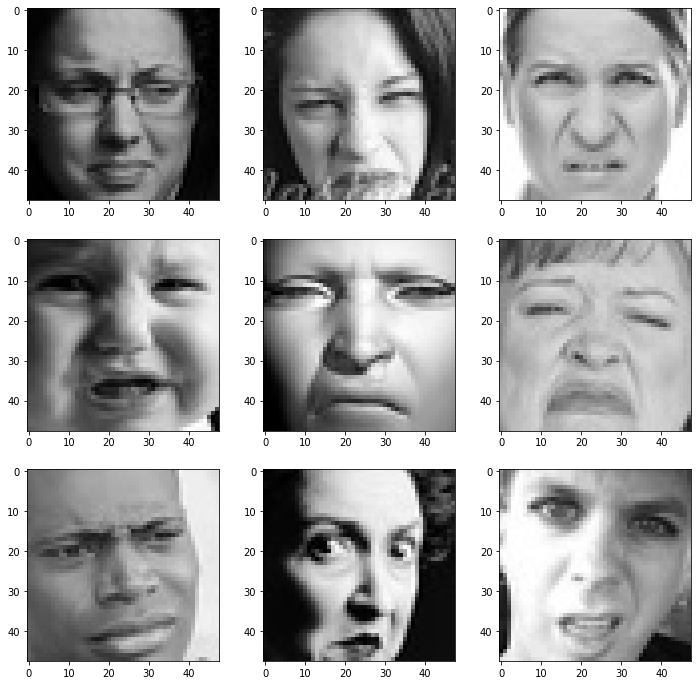

In [11]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path+"train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


In [12]:
#MAKING TRAINING AND VALIDATION DATA

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                             target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
#MODEL BUILDING

from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 3591      
                                                                 
Total para

In [14]:
#FITIING THE MODEL WITH TRAINING AND VALIDATION DATA

from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
223/224 [============================>.] - ETA: 0s - loss: 1.8218 - accuracy: 0.2969

224/224 [==============================] - 23s 59ms/step - loss: 1.8204 - accuracy: 0.2973 - val_loss: 1.7541 - val_accuracy: 0.3662 - lr: 0.0010
Epoch 2/10
224/224 [==============================] - ETA: 0s - loss: 1.4681 - accuracy: 0.4357

224/224 [==============================] - 18s 78ms/step - loss: 1.4681 - accuracy: 0.4357 - val_loss: 1.4545 - val_accuracy: 0.4524 - lr: 0.0010
Epoch 3/10
223/224 [============================>.] - ETA: 0s - loss: 1.2965 - accuracy: 0.5041

224/224 [==============================] - 13s 59ms/step - loss: 1.2964 - accuracy: 0.5040 - val_loss: 1.3836 - val_accuracy: 0.4505 - lr: 0.0010
Epoch 4/10
223/224 [============================>.] - ETA: 0s - loss: 1.1951 - accuracy: 0.5465

224/224 [==============================] - 13s 57ms/step - loss: 1.1945 - accuracy: 0.5467 - val_loss: 1.2320 - val_accuracy: 0.5269 - lr: 0.0010
Epoch 5/10
223/224 [============================>.] - ETA: 0s - loss: 1.1339 - accuracy: 0.5695

224/224 [==============================] - 13s 57ms/step - loss: 1.1345 - accuracy: 0.5694 - val_loss: 1.2633 - val_accuracy: 0.5236 - lr: 0.0010
Epoch 6/10
224/224 [==============================] - ETA: 0s - loss: 1.0849 - accuracy: 0.5886

224/224 [==============================] - 13s 57ms/step - loss: 1.0849 - accuracy: 0.5886 - val_loss: 1.1909 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 7/10
224/224 [==============================] - ETA: 0s - loss: 1.0384 - accuracy: 0.6060

224/224 [==============================] - 14s 61ms/step - loss: 1.0384 - accuracy: 0.6060 - val_loss: 1.0651 - val_accuracy: 0.5991 - lr: 0.0010
Epoch 8/10
224/224 [==============================] - ETA: 0s - loss: 0.9891 - accuracy: 0.6225

224/224 [==============================] - 13s 58ms/step - loss: 0.9891 - accuracy: 0.6225 - val_loss: 1.1039 - val_accuracy: 0.5776 - lr: 0.0010
Epoch 9/10
224/224 [==============================] - ETA: 0s - loss: 0.9491 - accuracy: 0.6412

224/224 [==============================] - 14s 62ms/step - loss: 0.9491 - accuracy: 0.6412 - val_loss: 1.0888 - val_accuracy: 0.5859 - lr: 0.0010
Epoch 10/10
224/224 [==============================] - ETA: 0s - loss: 0.9020 - accuracy: 0.6602Restoring model weights from the end of the best epoch: 7.



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 13s 60ms/step - loss: 0.9020 - accuracy: 0.6602 - val_loss: 1.1476 - val_accuracy: 0.5794 - lr: 0.0010
Epoch 10: early stopping


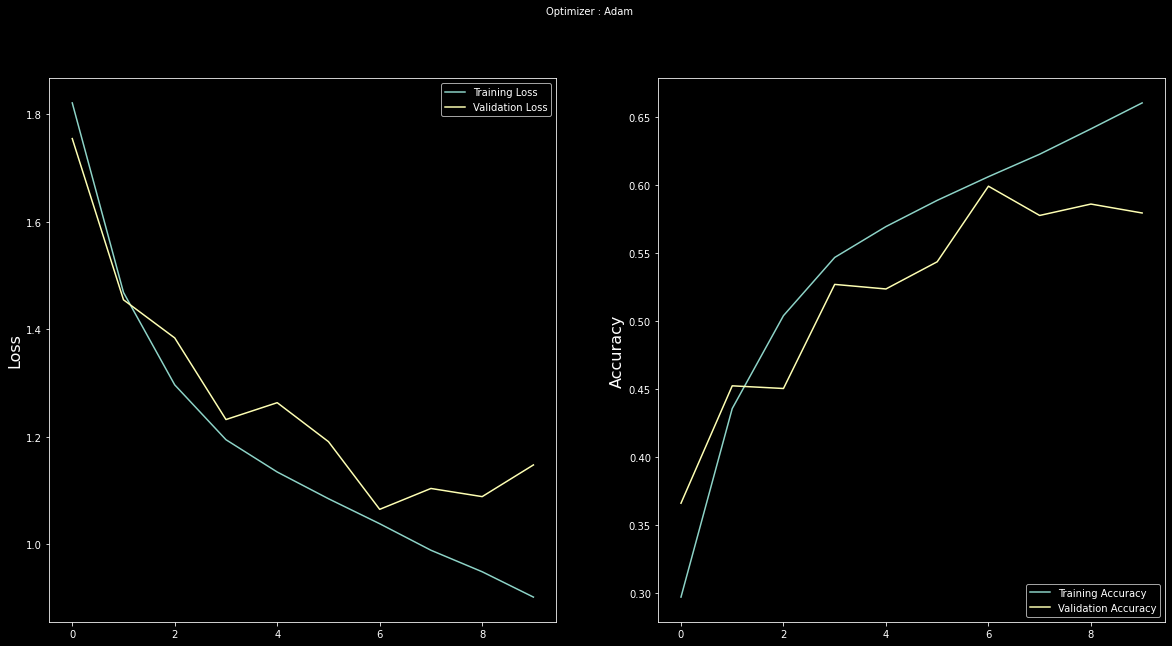

In [16]:
#PLOTTING ACCURACY AND LOSS

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()